In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [26]:
for i in tqdm(range(10000)):
    j=i
    #print(i)

100%|██████████| 10000/10000 [00:00<00:00, 2393326.11it/s]


In [70]:
class myRandom():
    def __init__(self, seed=15, method='simple'):
        self.r = seed
        self.method = method
        
        if method == 'simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D', 16)
            self.c = int('B', 16)
            self.M = 2**48
        else:
            print("Metodo no reconocido")
    
    def Random(self):
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        return r / float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_=32, method_='simple'):
        rand = myRandom(seed=seed_, method=method_)
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints) * np.abs( (np.mean(array**moment) - 1) /(moment + 1) )

In [71]:
#Vamos a crear una funcion de llenado

def fillPoints(seed_, method_, nPoints):
    rand = myRandom(seed =seed_, method = method_)
    points = np.zeros(nPoints)
    for i in range(nPoints):
        points[i] = rand.Random()
    return points


In [72]:
Npoints = 5000
Nsimple = fillPoints(165, 'simple', Npoints)
Nrand48 = fillPoints(630, 'drand48', Npoints)

In [73]:
#print(Nrand48)

In [74]:
indices = np.arange(Npoints)
even = (indices%2) == 0

Text(0.5, 0, 'Secuencia')

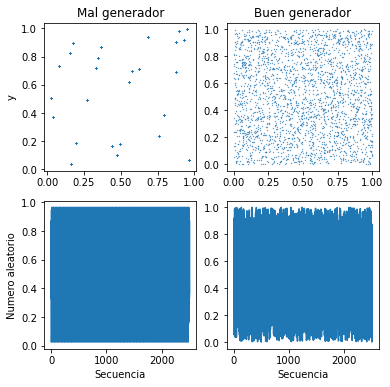

In [75]:
fig = plt.figure(figsize = (6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(Nsimple[even], Nsimple[~even], s=0.1)
ax1.set_ylabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Mal generador')

ax2.scatter(Nrand48[even], Nrand48[~even], s=0.1)
ax2.title.set_text('Buen generador')

ax3.plot(Nsimple[even])
ax3.set_xlabel('Secuencia')
ax3.set_ylabel('Numero aleatorio')

ax4.plot(Nrand48[even])
ax4.set_xlabel('Secuencia')


Como vemos, tenemos un generador malo, en el plot 1, porque se sobreponen.
Esta mejor el buen generador. 

In [76]:
#Probando nuestro generador de eventos

rand = myRandom(seed=16, method='drand48')
moments = []
points = np.linspace(1, 1e6, 11)

for k in tqdm(range(4)):
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]), k+1, 45, 'drand48'))
    moments.append(test)

100%|██████████| 4/4 [00:14<00:00,  3.67s/it]


In [77]:
print(moments)

[[0.4979844199837302, 78.9515529101014, 111.75578021594116, 136.92262632064327, 158.24473250143714, 176.79637848422672, 193.68352080076463, 209.18200280741283, 223.5470088866939, 237.0571269704744, 249.87397756567992], [0.33332791658293065, 70.1986614286319, 99.36070621619574, 121.71705416738781, 140.65039508569828, 157.15598109689859, 172.15714584866413, 185.91674153313642, 198.70174946463345, 210.73243642006076, 222.1338746000281], [0.2499999836231592, 59.25337098404751, 83.84842960451473, 102.70578099177462, 118.67057747424475, 132.60645480322938, 145.26106996054403, 156.86815064827175, 167.66585577017696, 177.82598157078948, 187.4491093811388], [0.19999999994718587, 50.57971274997546, 71.55791716848526, 87.64744852369759, 101.26408091202046, 113.16216604430564, 123.96011542955746, 133.86501437396097, 143.085129300332, 151.75948461193883, 159.97270244184585]]


Text(0.5, 0, 'Secuencia')

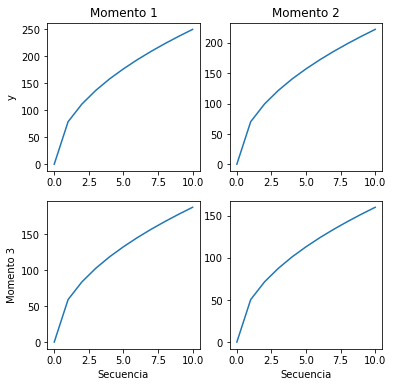

In [78]:
fig = plt.figure(figsize = (6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(moments[0])
ax1.set_ylabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Momento 1')

ax2.plot(moments[1])
ax2.title.set_text('Momento 2')

ax3.plot(moments[2])
ax3.set_xlabel('Secuencia')
ax3.set_ylabel('Momento 3')

ax4.plot(moments[3])
ax4.set_xlabel('Secuencia')

<h1>Generación de eventos usando numpy</h1>

In [79]:
x = np.random.rand()
print(x)

0.24069129926482136


In [80]:
vec = np.random.rand(3)
print(vec)

[0.11701905 0.9508408  0.72915335]


In [81]:
matrix = np.random.rand(2,3)
print(matrix)

[[0.28370247 0.22127224 0.04901852]
 [0.2651659  0.28273368 0.36263579]]


In [82]:
posiciones = []

for i in tqdm(range(10000)):
    posiciones.append( np.random.uniform(-1, 6.) )

100%|██████████| 10000/10000 [00:00<00:00, 338490.54it/s]


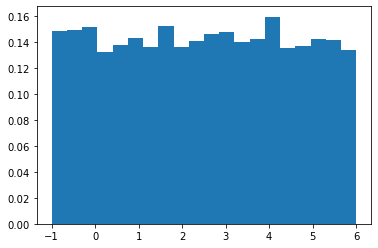

In [85]:
plt.hist(posiciones, 20, density=True)
plt.show()

<h1>Distribuciones no uniformes</h1>

In [88]:
poisson = []
gauss = []

for i in range(1000):
    poisson = np.append(poisson, np.random.poisson())
    gauss = np.append(gauss, np.random.standard_normal())
plt.show()

Text(0.5, 0, '$N$')

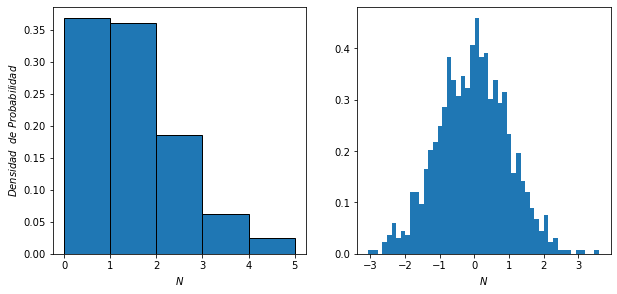

In [92]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.hist(poisson, bins=5, density=True, edgecolor='black')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$Densidad \ de \ Probabilidad$')

ax2.hist(gauss, bins=50, density=True)
ax2.set_xlabel(r'$N$')

<h1>Método de inversión</h1><br/>
$$ \frac{1}{\alpha}e^{\frac{x}{\alpha}}$$

In [93]:
def f(x, alpha):
    if (alpha != 0):
        return -alpha*np.log(1.-x)
    else:
        return 0

In [94]:
points = np.zeros(2000)
alpha = 50.
vectorexp = []

for i in range(2000):
    vectorexp = np.append(vectorexp, f(np.random.rand(), alpha))

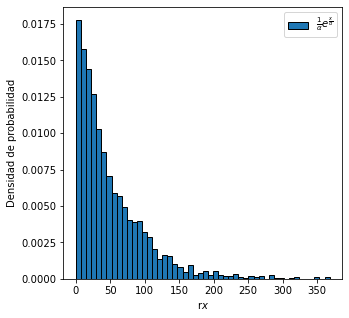

In [99]:
fig = plt.figure(figsize=(5,5))

plt.hist(vectorexp, 50, density=True, alpha=1, edgecolor='black', label=r'$\frac{1}{\alpha}e^{\frac{x}{\alpha}}$')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('r$x$')
plt.legend(loc=0)
plt.show()